<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello, my name is Dmitrii Pyshnenko. Happy to review your project! 🙌

As usual you can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 



<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
Overall well done! I can see that a lot of effort has been made! Your project already looks really good, and you accomplished impressive results.

There are no critical issues, so your project has been accepted. Congratulations! However, I want to send it back to you in case you have any questions along the way or you want to make additional changes to the project.
  
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
     Hello Dmitrii, Thanks your feedback was very helpfull!
</div>


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
Thank you for submitting your project with all corrections! 
- Now everything is perfect. No critial issues left, so your project has been accepted! 
- Wish you cool projects in the next sprints! ☘️
    
PS: As a last thing, I can recommend cool lectures on stat analysis here: https://www.youtube.com/playlist?list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo  🙌

</div>

### Introduction for the project

The goal of this project is to asses the paterns in behaviur of custumers of the telecom operator Megaline, The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

This is a preliminary analysis of the plans based on a relatively small client selection. Based on the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018.

#### Outline of work

- Assess the data, and make decisions about the values.

- construct charts, histograms and boxplots to find distrebution of values.

- Perform hypothesis testing on the data using Pandas, Numpy, and the spicy.stats module in Python.


### Open the data file and study the general information

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b>
 
It would be great to add additional information about the project goal and tasks. It gives an overview of what you are going to achieve in this project. Also, this introduction potentially can be used as a Readme file in your portfolio on Github. One example of a nice introduction for a data analysis project can be found here: https://github.com/CICIFLY/Data-Analytics-Projects/blob/master/AB%20Testing%20Result%20Analyze/readme.md

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np
from scipy import stats as st
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format


In [2]:
import sys
import warnings
if not sys.warnoptions:
        warnings.simplefilter("ignore");

In [3]:
pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Load the data files into a DataFrame

try: 
    data_calls = pd.read_csv('megaline_calls.csv')
except:
    data_calls = pd.read_csv('/datasets/megaline_calls.csv')
   
 
print(len(data_calls), data_calls.head())    

137735          id  user_id   call_date  duration
0   1000_93     1000  2018-12-27     8.520
1  1000_145     1000  2018-12-27    13.660
2  1000_247     1000  2018-12-27    14.480
3  1000_309     1000  2018-12-28     5.760
4  1000_380     1000  2018-12-30     4.220


In [5]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [6]:
data_calls.query('duration<0.01')['duration'].count()

26834

many calls have a duration of less then 0.01 minutes (missed calls), but they do not realy influence the data of duration as they are to short to change the revenue charged for phone time. So they can be left alone.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
Great that you've added a solution for zero-based sessions.

On a real project, of course, you can always find out the reason for such zeros. But in this case, it is enough to consider the alternatives and the impact of each decision.

In [7]:
#I check that the date data is only for 2018

print(data_calls.call_date.min())
print(data_calls.call_date.max())

2018-01-15
2018-12-31


In [8]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'])
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month

print(data_calls.head())  

         id  user_id  call_date  duration  month
0   1000_93     1000 2018-12-27     8.520     12
1  1000_145     1000 2018-12-27    13.660     12
2  1000_247     1000 2018-12-27    14.480     12
3  1000_309     1000 2018-12-28     5.760     12
4  1000_380     1000 2018-12-30     4.220     12


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
Everything is correct here but usually, it is always helpful to double-check whether we indeed have data within one year/time period. If not then selecting and aggregating data by the month number will cause an issue. So here it is safer to use datetime64[M] which provides a complete date. 

In [9]:
#For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. 

data_calls['duration'] = data_calls['duration'].apply(np.ceil)
data_calls['duration'].head()

0    9.000
1   14.000
2   15.000
3    6.000
4    5.000
Name: duration, dtype: float64

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Ok, great job! Good that you did not forget about data rounding. Also, great choice of np.ceil () method :)


In [10]:
data_calls.groupby(['user_id','month'])['duration'].sum()

user_id  month
1000     12      124.000
1001     8       182.000
         9       315.000
         10      393.000
         11      426.000
                   ...  
1498     12      339.000
1499     9       346.000
         10      385.000
         11      308.000
         12      496.000
Name: duration, Length: 2258, dtype: float64

In [11]:
try: 
    data_inter = pd.read_csv('megaline_internet.csv')
except:
    data_inter = pd.read_csv('/datasets/megaline_internet.csv')
    
    
print(len(data_inter), data_inter.head())     

104825          id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29   89.860
1  1000_204     1000   2018-12-31    0.000
2  1000_379     1000   2018-12-28  660.400
3  1000_413     1000   2018-12-26  270.990
4  1000_442     1000   2018-12-27  880.220


In [12]:
data_inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [13]:
#I check that the date data is only for 2018

print(data_inter.session_date.min())
print(data_inter.session_date.max())

2018-01-15
2018-12-31


In [14]:
data_inter['session_date'] = pd.to_datetime(data_inter['session_date'])
data_inter['month'] = pd.DatetimeIndex(data_inter['session_date']).month

print(data_inter.head())  

         id  user_id session_date  mb_used  month
0   1000_13     1000   2018-12-29   89.860     12
1  1000_204     1000   2018-12-31    0.000     12
2  1000_379     1000   2018-12-28  660.400     12
3  1000_413     1000   2018-12-26  270.990     12
4  1000_442     1000   2018-12-27  880.220     12


In [15]:
#For web traffic, individual web sessions are not rounded up.
#Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

((data_inter.groupby(['user_id','month'])['mb_used'].sum())/1024).apply(np.ceil)

user_id  month
1000     12       2.000
1001     8        7.000
         9       14.000
         10      22.000
         11      19.000
                  ...  
1498     12      23.000
1499     9       13.000
         10      20.000
         11      17.000
         12      22.000
Name: mb_used, Length: 2277, dtype: float64

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Well done! Both data aggregation and rounding is correct. 

In [16]:
try: 
    data_mess = pd.read_csv('megaline_messages.csv')
except:
    data_mess = pd.read_csv('/datasets/megaline_messages.csv')
        
    
print(len(data_mess), data_mess.head())     

76051          id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


In [17]:
data_mess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
#I check that the date data is only for 2018

print(data_mess.message_date.min())
print(data_mess.message_date.max())

2018-01-15
2018-12-31


In [19]:
data_mess['message_date'] = pd.to_datetime(data_mess['message_date'])
data_mess['month'] = pd.DatetimeIndex(data_mess['message_date']).month

print(data_mess.head())  

         id  user_id message_date  month
0  1000_125     1000   2018-12-27     12
1  1000_160     1000   2018-12-31     12
2  1000_223     1000   2018-12-31     12
3  1000_251     1000   2018-12-27     12
4  1000_255     1000   2018-12-26     12


In [20]:
data_mess.groupby(['user_id','month'])['id'].count()

user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
                  ..
1496     9        21
         10       18
         11       13
         12       11
1497     12       50
Name: id, Length: 1806, dtype: int64

In [21]:
try: 
    data_plans = pd.read_csv('megaline_plans.csv')
except:
    data_plans = pd.read_csv('/datasets/megaline_plans.csv')

    
print(len(data_plans), data_plans.head())   

2    messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10            0.030           0.030      surf  
1               70           7            0.010           0.010  ultimate  


In [22]:
try: 
    data_users = pd.read_csv('megaline_users.csv')
except:
    data_users = pd.read_csv('/datasets/megaline_users.csv')
    

print(len(data_users), data_users.head())      

500    user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


In [23]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [24]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'])
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
plan          500 non-null object
churn_date    34 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Prepare the data

#### The number of minutes per month, the number of text messages per month, the volume of data per month



In [25]:
#merging data (by user id, month)
calls = data_calls.groupby(['user_id','month'])['duration'].sum()
messages = data_mess.groupby(['user_id','month'])['id'].count()
internet = ((data_inter.groupby(['user_id','month'])['mb_used'].sum())/1024).apply(np.ceil)


data_frames = [calls, messages, internet]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), data_frames)

df_merged.head()

duration     id  mb_used
user_id month                          
1000    12      124.000 11.000    2.000
1001    8       182.000 30.000    7.000
        9       315.000 44.000   14.000
        10      393.000 53.000   22.000
        11      426.000 36.000   19.000

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Indeed `how = 'outer' can be used here to prevent data loss.
   
Or use concat method, as it already has `how = 'outer' by default. 

In [26]:
#I realy need to change column names...

df_merged.columns=['call_minutes', 'messages', 'gb_used']

print(len(df_merged), df_merged.head())   

2293                call_minutes  messages  gb_used
user_id month                                 
1000    12          124.000    11.000    2.000
1001    8           182.000    30.000    7.000
        9           315.000    44.000   14.000
        10          393.000    53.000   22.000
        11          426.000    36.000   19.000


#### The monthly revenue from each user

In [27]:
df_merged_plan = df_merged.copy()
#df_merged_plan['month_calc'] = df_merged_plan['month']
df_merged_plan = df_merged_plan.merge(data_users, on='user_id')

print(len(df_merged_plan), df_merged_plan.head())   

2293    user_id  call_minutes  messages  gb_used first_name  last_name  age  \
0     1000       124.000    11.000    2.000   Anamaria      Bauer   45   
1     1001       182.000    30.000    7.000     Mickey  Wilkerson   28   
2     1001       315.000    44.000   14.000     Mickey  Wilkerson   28   
3     1001       393.000    53.000   22.000     Mickey  Wilkerson   28   
4     1001       426.000    36.000   19.000     Mickey  Wilkerson   28   

                                    city   reg_date      plan churn_date  
0  Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24  ultimate        NaN  
1        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf        NaN  
2        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf        NaN  
3        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf        NaN  
4        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf        NaN  


In [28]:
def revenue(row):
    ulti_gb = 30720/1024
    surf_gb = 15360/1024
    plan=row['plan']
    phone=row['call_minutes']
    mess=row['messages']
    inter=row['gb_used']
    if plan == 'ultimate':
        fee=70
        if phone > 3000:
            fee+= (phone-3000)*0.01
        if mess >  1000:
            fee+= (mess-1000)*0.01
        if inter > ulti_gb:
            fee+= (inter-ulti_gb)*7
        return fee
    elif plan == 'surf':
        fee=20
        if phone > 500:
            fee+= (phone-500)*0.03
        if mess >  50:
            fee+= (mess-50)*0.03
        if inter > surf_gb:
            fee+= (inter-surf_gb)*10
        return fee

In [29]:
df_merged_plan['revenue'] = df_merged_plan.apply(revenue, axis=1)
df_merged_plan.head(15)

,user_id,call_minutes,messages,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,revenue
0,1000,124.000,11.000,2.000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,70.000
1,1001,182.000,30.000,7.000,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,20.000
2,1001,315.000,44.000,14.000,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,20.000
3,1001,393.000,53.000,22.000,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,90.090
4,1001,426.000,36.000,19.000,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,60.000
5,1001,412.000,44.000,19.000,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,60.000
6,1002,59.000,15.000,7.000,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,20.000
7,1002,386.000,32.000,19.000,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,60.000
8,1002,384.000,41.000,15.000,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,20.000
9,1003,1104.000,50.000,27.000,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,158.120


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Everything is correct here and great that you created a funciton to calculate revenue.  
    
Btw it is also possible to make the calculation of revenue a little bit differently using np.where - [https://numpy.org/doc/stable/reference/generated/numpy.where.html](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

```
  np.where ('condition: if exceeding the package limit', 'multiply the difference by the price of additional services', '0')
```
    
Great thing about python is that there are so many libraries and ready-to-use functions. For example, this task can also be solved using .clip() (a useful method in many tasks). You can read about it here: https://www.pythonpool.com/numpy-clip/

```
total5['gb_surcharge'] = (total5['gb_used'] - total5['gb_per_month_included']).clip(0) * total5['usd_per_gb']
```

Also, it is better to avoid hard-coding in your functions of all values from the data plans. These values could be frequently updated and it will be annoyingly inconvenient to update them once again in the function. I would recommend using an actual table with values or create a separate data dictionary - https://towardsdatascience.com/12-examples-to-master-python-dictionaries-5a8bcd688c6d

### Analyze the data

Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, dispersion, and standard deviation. Plot histograms. Describe the distributions.

In [30]:
df_surf = df_merged_plan.query('plan == "surf"')
df_ulti = df_merged_plan.query('plan == "ultimate"')
print(df_surf.head(),df_ulti.head())

   user_id  call_minutes  messages  gb_used first_name  last_name  age  \
1     1001       182.000    30.000    7.000     Mickey  Wilkerson   28   
2     1001       315.000    44.000   14.000     Mickey  Wilkerson   28   
3     1001       393.000    53.000   22.000     Mickey  Wilkerson   28   
4     1001       426.000    36.000   19.000     Mickey  Wilkerson   28   
5     1001       412.000    44.000   19.000     Mickey  Wilkerson   28   

                              city   reg_date  plan churn_date  revenue  
1  Seattle-Tacoma-Bellevue, WA MSA 2018-08-13  surf        NaN   20.000  
2  Seattle-Tacoma-Bellevue, WA MSA 2018-08-13  surf        NaN   20.000  
3  Seattle-Tacoma-Bellevue, WA MSA 2018-08-13  surf        NaN   90.090  
4  Seattle-Tacoma-Bellevue, WA MSA 2018-08-13  surf        NaN   60.000  
5  Seattle-Tacoma-Bellevue, WA MSA 2018-08-13  surf        NaN   60.000       user_id  call_minutes  messages  gb_used first_name last_name  age  \
0      1000       124.000    11.000  

#### minutes per month

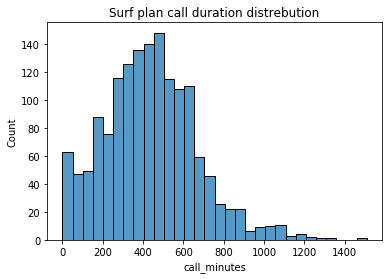

In [31]:
sns.histplot(data=df_surf, x="call_minutes")
plt.title("Surf plan call duration distrebution")
plt.show()

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Adding titles to your graphs is important for providing context for the users so they understand what they are looking at. Together with for example legends and axis labels this is important to support unambiguous interpretation of displayed information.

In [32]:
#histogram is skewed right 
df_surf['call_minutes'].mean()>df_surf['call_minutes'].median()

True

In [33]:
df_surf['call_minutes'].describe()

count   1545.000
mean     436.520
std      229.284
min        0.000
25%      279.000
50%      430.000
75%      579.000
max     1510.000
Name: call_minutes, dtype: float64

As can be seen in the histogram chart most monthly call_minutes duration amount to between 300 and 550 minutes (as also can be seen by the positions of Q1 and Q3). With a mean of ~437, and median of 430 call minutes per month, which is within the program limit of 500 minutes, without overcharge fees.  

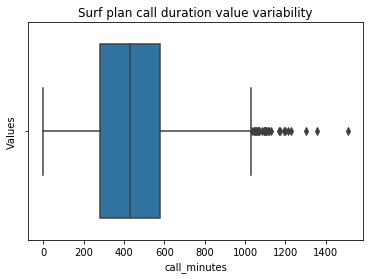

In [48]:
sns.boxplot(x=df_surf['call_minutes']).set(
    xlabel='call_minutes', 
    ylabel='Values'
)
plt.title("Surf plan call duration value variability")
plt.show()

In [42]:
np.var(df_surf['call_minutes'])

52537.03666530514

In [43]:
stdev_min_surf = np.std(df_surf['call_minutes'])
print(stdev_min_surf)

229.20959112852398


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
It's great that you managed to calculate all the necessary metrics and display them.

There is also a way to display all statistical metrics in one table (you can pass all metrics to aggfunc at once.), using, for example, pivot_table:

`data.pivot_table(index= 'tariff', values= '...', aggfunc= ['mean', 'var','std', 'median'])`

In [44]:
min_bot_surf = df_surf['call_minutes'].mean() -3*stdev_min_surf
min_top_surf =df_surf['call_minutes'].mean() +3*stdev_min_surf 

if min_bot_surf <0:
    min_bot_surf =0
#minutes can't be negative value

print('Interval: '+ str(min_bot_surf) +' - '+str(min_top_surf))

Interval: 0 - 1124.1485144858957


The standrt devation is very similar to what the describe method calculated, and considering the interval of values that's quite large standard deviation. (stdev is like more then half the median and mean values, I believe this is called "plus minus lapot"(плюс минус лапоть), could not find English analog please forgive me...)  

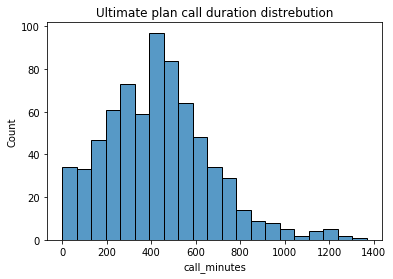

In [45]:
sns.histplot(data=df_ulti, x="call_minutes")
plt.title("Ultimate plan call duration distrebution")
plt.show()

In [46]:
#histogram is skewed right 
df_ulti['call_minutes'].mean()>df_ulti['call_minutes'].median()

True

In [47]:
df_ulti['call_minutes'].describe()

count    713.000
mean     434.676
std      237.852
min        0.000
25%      263.000
50%      425.000
75%      566.000
max     1369.000
Name: call_minutes, dtype: float64

As can be seen in this histogram chart most monthly call_minutes duration amount to between 300 and 550 minutes once again (as also can be seen by the positions of Q1 and Q3). With a very similar mean of ~435, and lower then the previous histogram median of 425 call minutes per month, which is within the program limit of 3000 minutes, without overcharge fees. It seems (if judged only by the minutes) that this plan is redundent for some of the custumers the surf plan is better suited for them.   

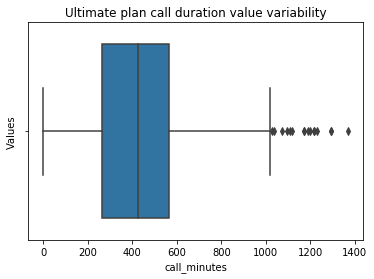

In [49]:
sns.boxplot(x=df_ulti['call_minutes']).set(
    xlabel='call_minutes', 
    ylabel='Values'
)
plt.title("Ultimate plan call duration value variability")
plt.show()

In [50]:
np.var(df_ulti['call_minutes'])

56494.28633925359

In [51]:
stdev_min_ulti = np.std(df_ulti['call_minutes'])
print(stdev_min_ulti)

237.68526740051345


In [52]:
min_bot_ulti = df_ulti['call_minutes'].mean() -3*stdev_min_ulti
min_top_ulti =df_ulti['call_minutes'].mean() +3*stdev_min_ulti 

if min_bot_ulti <0:
    min_bot_ulti =0
#minutes can't be negative value

print('Interval: '+ str(min_bot_ulti) +' - '+str(min_top_ulti))

Interval: 0 - 1147.731819031835


The standrt devation is again very similar to what the describe method calculated, and considering the interval of values is again quite large standard deviation.

- as can be seen the minutes per month hisograms are very similar both by how they look and the data they contain.

- dispersion minutes per month is also very similar, between the two plans, judgging by box plot. But veriability is very different (52537.037 for surf, and 56494.286 for ultimate), so it's diferent.  

- standard deviation in both cases is quite large considering the value dispersion. Considering the variability it's no suprise that the standard deviations are not similar.

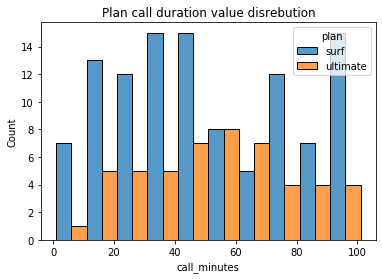

In [112]:
fig, ax = plt.subplots()
sns.histplot(
    data=pd.concat([df_surf, df_ulti]), x='call_minutes', hue='plan', multiple='dodge',
    bins=range(1, 110, 10), ax=ax
)
plt.title("Plan call duration value disrebution")
plt.show()

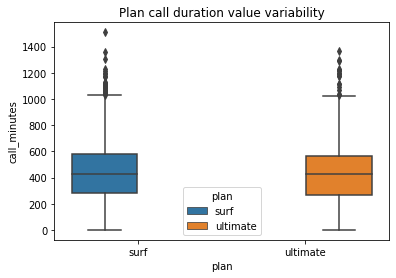

In [103]:
sns.boxplot(data=pd.concat([df_surf, df_ulti]),y='call_minutes',x='plan',hue='plan')
plt.title("Plan call duration value variability")
plt.show()

#### messages per month

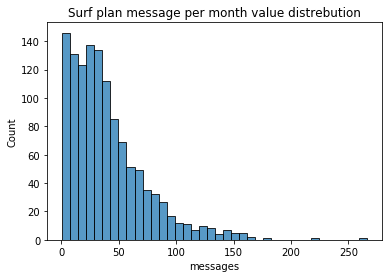

In [53]:
sns.histplot(data=df_surf, x="messages")
plt.title("Surf plan message per month value distrebution")
plt.show()

In [54]:
#histogram is strongly skewed right 
df_surf['messages'].mean()>df_surf['messages'].median()

True

In [55]:
df_surf['messages'].describe()

count   1222.000
mean      40.110
std       33.035
min        1.000
25%       16.000
50%       32.000
75%       54.000
max      266.000
Name: messages, dtype: float64

As can be seen in the histogram chart most monthly custumers send between 15 and 50 messages per month (also can be seen by the positions of Q1 and Q3). With a mean of ~40, and median of 32 messages per month, which is within the program limit of 50 messagess, without overcharge fees. 

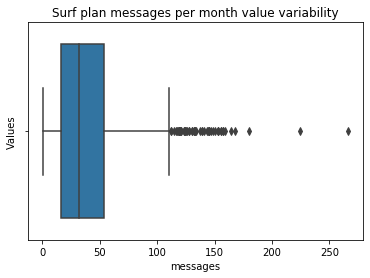

In [56]:
sns.boxplot(x=df_surf['messages']).set(
    xlabel='messages', 
    ylabel='Values'
)
plt.title("Surf plan messages per month value variability")
plt.show()

In [57]:
np.var(df_surf['messages'])

1090.4511506183685

In [58]:
stdev_mess_surf = np.std(df_surf['messages'])
print(stdev_mess_surf)

33.02197981070137


In [59]:
mess_bot_surf = df_surf['messages'].mean() -3*stdev_mess_surf
mess_top_surf = df_surf['messages'].mean() +3*stdev_mess_surf

if mess_bot_surf  <0:
    mess_bot_surf  =0
#minutes can't be negative value

print('Interval: '+ str(mess_bot_surf ) +' - '+str(mess_top_surf))

Interval: 0 - 139.17559573324976


this stdev is larger then the median (and almost as large as the mean), so it is also large, as can be seen by the destribution of values in the boxplot (and the calculated interval).

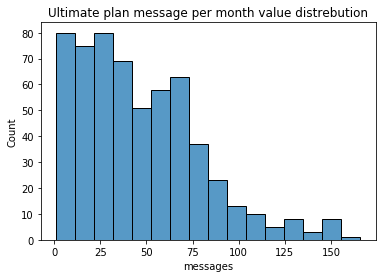

In [60]:
sns.histplot(data=df_ulti, x="messages")
plt.title("Ultimate plan message per month value distrebution")
plt.show()

In [61]:
#histogram is skewed right 
df_ulti['messages'].mean()>df_ulti['messages'].median()

True

In [62]:
df_ulti['messages'].describe()

count   584.000
mean     46.296
std      32.942
min       1.000
25%      21.000
50%      41.000
75%      66.000
max     166.000
Name: messages, dtype: float64

As can be seen in the histogram chart most monthly custumers send between 20 and 70 messages per month (also can be seen by the positions of Q1 and Q3). With a mean of ~46, and median of 41 messages per month, which is within the program limit of 1000 messagess, without overcharge fees. In fact all of the values fall within that limit with a maximal value at 166 messages which is like 0.2 of the plan limit.

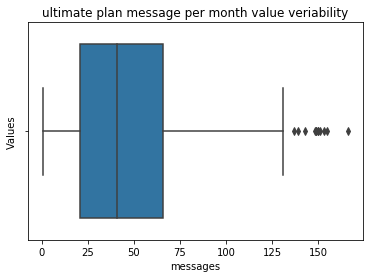

In [63]:
sns.boxplot(x=df_ulti['messages']).set(
    xlabel='messages', 
    ylabel='Values'
)
plt.title("ultimate plan message per month value veriability")
plt.show()

In [64]:
np.var(df_ulti['messages'])

1083.3249173156314

In [65]:
stdev_mess_ulti = np.std(df_ulti['messages'])
print(stdev_mess_ulti)

32.91390158148425


In [66]:
mess_bot_ulti = df_ulti['messages'].mean() -3*stdev_mess_ulti
mess_top_ulti = df_ulti['messages'].mean() +3*stdev_mess_ulti

if mess_bot_ulti  <0:
    mess_bot_ulti  =0
#minutes can't be negative value

print('Interval: '+ str(mess_bot_ulti ) +' - '+str(mess_top_ulti))

Interval: 0 - 145.03793762116507


this stdev is quite large, it's more then half (3/4) of the median value, it can be seen by the destribution of values in the boxplot (and the calculated interval). Its much better then that of the surf plan, considering the values. And it's quite similar to it (33 for surf, 32.9 for ulti, very similar). 

- as can be seen the messages per month hisograms look very similar. But the values show that the messages per month of ultimate plan users are a wee bit higher (20 to 70 messages), then those of surf plan users (15 to 50 messages). As can also be testified by the higher mean and median values. But judging by those same values (mean and median) they are not that diferent.

- dispersion of messages per month is very different as can be seen in the box plots, while values of ultimate plan users tend to be higher (in all quartiles). And more or less between the quartiles, with few vry high values and max around 166, the surf data goes up to 266, and shows a much more values not between Q1 and Q3. Veriabilty close but also diferent (1090.451 and 1083.325).  

- standard deviation in both cases is quite large considering the value dispersion. And very similar between the two plans.

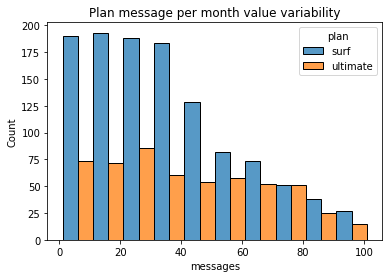

In [110]:
fig, ax = plt.subplots()
sns.histplot(
    data=pd.concat([df_surf, df_ulti]), x='messages', hue='plan', multiple='dodge',
    bins=range(1, 110, 10), ax=ax
)
plt.title("Plan message per month value disrebution")
plt.show()

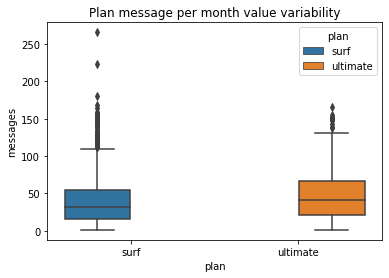

In [104]:
sns.boxplot(data=pd.concat([df_surf, df_ulti]),y='messages',x='plan',hue='plan')
plt.title("Plan message per month value variability")
plt.show()

####  Gb per month

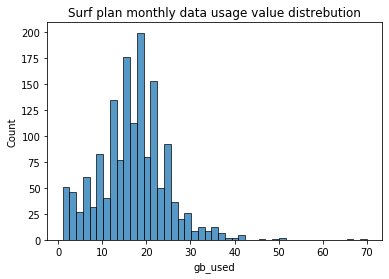

In [68]:
sns.histplot(data=df_surf, x="gb_used")
plt.title("Surf plan monthly data usage value distrebution")
plt.show()

In [69]:
#histogram is very sligtly skewed left, almost identical (mean 16.8 and median 17) 
df_surf['gb_used'].mean()<df_surf['gb_used'].median()

True

In [70]:
df_surf['gb_used'].describe()

count   1558.000
mean      16.831
std        7.712
min        1.000
25%       12.000
50%       17.000
75%       21.000
max       70.000
Name: gb_used, dtype: float64

As can be seen in the histogram chart most monthly custumers use somthing between 12 and 22 gigabites of data per month (similar to the quartiles in describe method). With a mean of ~17, and median of 17 gigabites of data per month, which is very nice becuse it reminds normal disrebution chart (gausian bell chart). But it's not within the plan limit of 15360 mb (which are 15 Gb), which means overcharge fees for more then half the plan users.


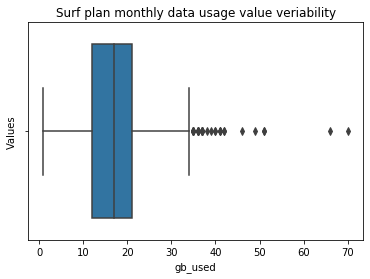

In [71]:
sns.boxplot(x=df_surf['gb_used']).set(
    xlabel='gb_used', 
    ylabel='Values'
)
plt.title("Surf plan monthly data usage value veriability")
plt.show()

In [72]:
np.var(df_surf['gb_used'])

59.43556096242673

In [73]:
stdev_giga_surf = np.std(df_surf['gb_used'])
print(stdev_giga_surf)

7.709446216326223


In [74]:
giga_bot_surf = df_surf['gb_used'].mean() -3*stdev_giga_surf
giga_top_surf = df_surf['gb_used'].mean() +3*stdev_giga_surf

if giga_bot_surf  <0:
    giga_bot_surf  =0
#minutes can't be negative value

print('Interval: '+ str(giga_bot_surf ) +' - '+str(giga_top_surf))

Interval: 0 - 39.95953248723284


The standrt devation is very similar to what the describe method calculated, and considering the interval of values that's quite large standard deviation. 

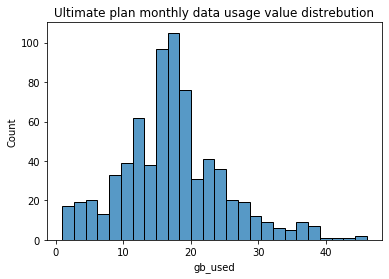

In [75]:
sns.histplot(data=df_ulti, x="gb_used")
plt.title("Ultimate plan monthly data usage value distrebution")
plt.show()

In [76]:
#histogram is very sligtly skewed right, almost identical (mean 17.3 and median 17) 
df_ulti['gb_used'].mean()<df_ulti['gb_used'].median()

False

In [77]:
df_ulti['gb_used'].describe()

count   719.000
mean     17.331
std       7.648
min       1.000
25%      13.000
50%      17.000
75%      21.000
max      46.000
Name: gb_used, dtype: float64

As can be seen in the histogram chart most monthly custumers use somthing between 15 and 20 gigabites of data per month (quite similar to the quartiles in describe method). With a mean of ~17, and median of 17 gigabites of data per month, which is very nice becuse it reminds normal disrebution chart (gausian bell chart). And it's within the plan limit of 30720 mb (which are 30 Gb), which means no overcharge fees for most plan users.

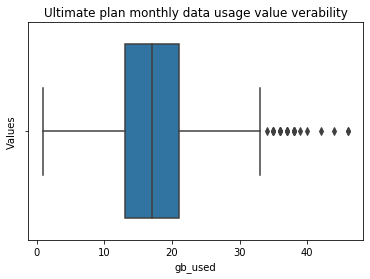

In [79]:
sns.boxplot(x=df_ulti['gb_used']).set(
    xlabel='gb_used', 
    ylabel='Values'
)
plt.title("Ultimate plan monthly data usage value verability")
plt.show()

In [80]:
np.var(df_ulti['gb_used'])

58.413377411448835

In [81]:
stdev_giga_ulti = np.std(df_ulti['gb_used'])
print(stdev_giga_surf)

7.709446216326223


In [82]:
giga_bot_ulti = df_ulti['gb_used'].mean() -3*stdev_giga_ulti
giga_top_ulti = df_ulti['gb_used'].mean() +3*stdev_giga_ulti

if giga_bot_ulti <0:
    giga_bot_ulti  =0
#minutes can't be negative value

print('Interval: '+ str(giga_bot_ulti) +' - '+str(giga_top_ulti))

Interval: 0 - 40.25960872956725


The standrt devation is very similar to what the describe method calculated, and considering the interval of values that's quite large standard deviation. And its identical between surf plan and ultimate plan, which is very interesting for further statistical analysys.

- as can be seen the data use per month hisograms look very similar. Though the max value of surf plan data usege is much higher (70 for surf compered to 46 for ultimate). All othe values are very similar as can be seen by the identical median, the very close mean values 16.8 and 17.3, and the positions of the quartiles (first(0.25) 12 and 13, third(0.75) both at 21).

- dispersion of data use per month is very similar as can be seen in the box plots, the surf data goes up to 70, and shows a much more values not between Q1 and Q3 (so caled outliers), but other then that most of the data is very similar. Veriability not equal, but also very close (59.436 surf, 58.413 ulti).

- standard deviation in both cases is quite large considering the value dispersion. And it's identical (~7.709 in both plans).

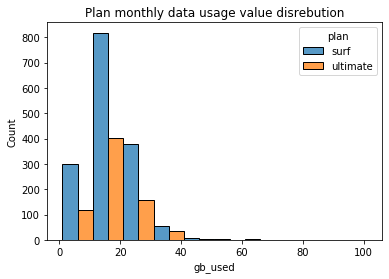

In [113]:
fig, ax = plt.subplots()
sns.histplot(
    data=pd.concat([df_surf, df_ulti]), x='gb_used', hue='plan', multiple='dodge',
    bins=range(1, 110, 10), ax=ax
)
plt.title("Plan monthly data usage value disrebution")
plt.show()

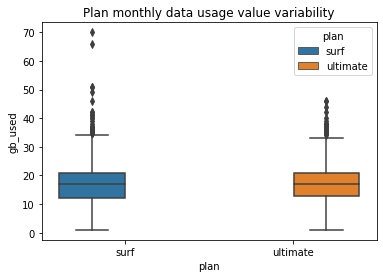

In [114]:
sns.boxplot(data=pd.concat([df_surf, df_ulti]),y='gb_used',x='plan',hue='plan')
plt.title("Plan monthly data usage value variability")
plt.show()

<b>intermidiate conclusions based on analysys of the data<b>

- Minutes: As can be seen the minutes per month hisograms are very similar as is the distrebution minutes per month, between the two plans. standard deviation in both cases is quite large considering the value distrebuion. Veriabilty is obviously not equal considering the differance in stendard deviations, so the value dispersion is diferent.
    

- Messages: as can be seen the messages per month hisograms look very similar. But the values show that the messages per month of ultimate plan users are a wee bit higher (20 to 70 messages), then those of surf plan users (15 to 50 messages). As can also be testified by the higher mean and median values. But judging by those same values (mean and median) they are not that diferent. dispersion of messages per month is very different as can be seen in the box plots, while values of ultimate plan users tend to be higher (in all quartiles). And more or less between the quartiles, with few vry high values and max around 166, the surf data goes up to 266, and show much more values not between Q1 and Q3. standard deviation in both cases is quite large considering the value dispersion. And is very similar between the two plans (33 for surf, 32.9 for ulti, almost identical). Veriability is not equal, but very close to it (considering that it is sqere of standard deviation).

    
- Data usage(Gb): As can be seen the data use per month hisograms look very similar. Though the max value of surf plan data usege is much higher (70 for surf compered to 46 for ultimate). All othe values are very similar as can be seen by the identical median, the very close mean values 16.8 and 17.3, and the positions of the quartiles (first(0.25) 12 and 13, third(0.75) both at 21).  dispersion of data use per month is very similar as can be seen in the box plots, the surf data goes up to 70, and shows a much more values not between Q1 and Q3 (so caled outliers), but other then that most of the data is very similar. standard deviation in both cases is quite large considering the value dispersion. And it's in fact identical (~7.709 in both plans). Thogh revenue vise most surf plan users will need to pay overcharge as the median 17Gb is higher then the 15Gb included in the plan. Veriability is obviously equal(7.709^2 is equal to itself), average data use might just be equal between the plans (it can be tested, but why should it). 

    
In conclusion the two plans have alot of similarities in many things (calls, messages, data usage), but the data also shows clear diferances (aspecialy in minutes per month) as testified by the diferent variabilities. However the data usage is clearly very similar, that needs to be analysed because in that aspect users of both plans might have similar behaviour. 

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- I will write overall thoughts about the data analysis section:
- Very nice visualization of the data. Great that you used different graph types to check available data.
- Additionally could be great to add both plans on one graph.
- If you have time and willing to practice, you can display two charts (histogram and a box plot) using a two-column subplot.

```
    # Create one row with 2 columns
	  fig, axes = plt.subplots(1, 2, figsize=(16, 5))

	  # Create a histogram for the surf plan
	  sns.distplot(... ax=axes[0])
	  # Create a histogram for the second plan
	  sns.distplot(... ax=axes[0])
	
	  # Create a boxplot for both plans
	  sns.boxplot(... ax=axes[1])
```

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    Thanks, I will try to do that.
</div>


### Test the hypotheses

In [73]:
alpha = 0.05 # like almost always

#### The average revenue from users of Ultimate and Surf calling plans differs.

In [74]:
np.var(df_surf['revenue'])

3065.8848438690247

In [75]:
np.var(df_ulti['revenue'])

129.66814043209877

In [76]:
np.var(df_surf['revenue']) == np.var(df_ulti['revenue'])

False

Variability values of revenue values of the diferent plans are Not equal.

In [77]:
# to be certain (it didn't work before...)
st.levene(df_surf['revenue'], df_ulti['revenue'], center='mean' )

LeveneResult(statistic=594.6026163420061, pvalue=5.915081558303153e-117)

pvalue on Levene test for equal variances is small so they are not equal.

In [78]:
results1 = st.ttest_ind(df_surf['revenue'], df_ulti['revenue'], equal_var = False)
# this tests the hypothesis that the means of the two independent populations are equal...I think

In [79]:
print('p-value:', results1.pvalue)

p-value: 3.17039054811355e-15


In [80]:
if (results1.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We reject the null hypothesis


That means that average revenue from users of Ultimate and Surf calling plans differs, which needed to be proven. 
And it was proven, because the null hypotesis was rejected.

<b> Essentially, a t-test allows us to compare the average values of the two data sets and determine if they came from the same population. So mathematically, the t-test takes a sample from each of the two sets and establishes the problem statement by assuming a null hypothesis that the two means are equal. So basicaly what was needed, if null hypotesis is rejected then the average values are certenly not equal, like in this case.
    
The alternative hypothesis, is that Ultimate plan users are more profitable. As t-test proved they are indeed different.  <b>

    

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b>
 
Can you please also formulate an alternative hypothesis in addition to the null hypotheses?

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    Done.
</div>

In [81]:
#df_surf['revenue'].mean() < df_ulti['revenue'].mean()

True

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1</b>
 
Unfortunately, it is not possible to make this decision based on the  two-tailed test. You can only confirm that revenue is different and proceed with one-tailed test to determine a sign. 

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    Thanks, undersood, I will remove that part.
</div>

#### The average revenue from users in NY-NJ area is different from that of the users from other regions.

In [82]:
df_nynj = df_merged_plan[df_merged_plan['city'].str.contains('NJ|NY', regex=True) == True]
                        
df_other = df_merged_plan[df_merged_plan['city'].str.contains('NJ|NY', regex=True) == False]

In [83]:
print(df_nynj.head())

    user_id  call_minutes  messages  gb_used first_name last_name  age  \
56     1014       163.000     9.000    2.000    Edmundo     Simon   61   
57     1014      1114.000    64.000    8.000    Edmundo     Simon   61   
75     1022       302.000       nan    5.000         Bo      Snow   73   
76     1022       490.000       nan   23.000         Bo      Snow   73   
77     1022       475.000       nan   10.000         Bo      Snow   73   

                                         city   reg_date  plan  churn_date  \
56  New York-Newark-Jersey City, NY-NJ-PA MSA 2018-11-25  surf         NaN   
57  New York-Newark-Jersey City, NY-NJ-PA MSA 2018-11-25  surf         NaN   
75  New York-Newark-Jersey City, NY-NJ-PA MSA 2018-04-20  surf  2018-09-07   
76  New York-Newark-Jersey City, NY-NJ-PA MSA 2018-04-20  surf  2018-09-07   
77  New York-Newark-Jersey City, NY-NJ-PA MSA 2018-04-20  surf  2018-09-07   

    revenue  
56   20.000  
57   38.840  
75   20.000  
76  100.000  
77   20.000  


In [84]:
print(df_other.head())

   user_id  call_minutes  messages  gb_used first_name  last_name  age  \
0     1000       124.000    11.000    2.000   Anamaria      Bauer   45   
1     1001       182.000    30.000    7.000     Mickey  Wilkerson   28   
2     1001       315.000    44.000   14.000     Mickey  Wilkerson   28   
3     1001       393.000    53.000   22.000     Mickey  Wilkerson   28   
4     1001       426.000    36.000   19.000     Mickey  Wilkerson   28   

                                    city   reg_date      plan churn_date  \
0  Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24  ultimate        NaN   
1        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf        NaN   
2        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf        NaN   
3        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf        NaN   
4        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13      surf        NaN   

   revenue  
0   70.000  
1   20.000  
2   20.000  
3   90.090  
4   60.000  


In [85]:
np.var(df_nynj['revenue'])

2105.8745274388602

In [86]:
np.var(df_other['revenue'])

2187.994397562204

In [87]:
np.var(df_nynj['revenue']) == np.var(df_other['revenue'])

False

In [88]:
st.levene(df_nynj['revenue'], df_other['revenue'], center='mean' )

LeveneResult(statistic=8.8153187695944, pvalue=0.00301811812896882)

Variability values of NY-NJ region and other regions are Not equal.

In [89]:
results2 = st.ttest_ind(df_nynj['revenue'], df_other['revenue'], equal_var = False)


In [90]:
print('p-value:', results2.pvalue)

p-value: 0.10667494170371572


In [91]:
if (results2.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We can't reject the null hypothesis


The average revenue from users in NY-NJ area is probably not different from that of the users from other regions, as the null hypotesis could not be rejected. 

<b> Failing to reject the null indicates that our sample did not provide sufficient evidence to conclude that the effect exists. However, at the same time, that lack of evidence doesn’t prove that the effect does not exist.
    
So NY-NJ region might be as profitable as the other regions, which is logical after all why shold it be more or less profitable then other regions. <b>
    



<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- Overall great job!  Great that you additionally checked data that has been used for the test. 
- Your conclusions based on the results are also correct.
- Great that you additionally correctly compared the variances using Levene test.

### Overall conclusion

The analysis showed that:

- Minutes: As can be seen the minutes per month hisograms are very similar as is the distrebution minutes per month, between the two plans. standard deviation in both cases is quite large considering the value distrebuion. Veriabilty is obviously not equal considering the differance in stendard deviations, so the value dispersion is diferent.


- Messages: as can be seen the messages per month hisograms look very similar. But the values show that the messages per month of ultimate plan users are a wee bit higher (20 to 70 messages), then those of surf plan users (15 to 50 messages). As can also be testified by the higher mean and median values. But judging by those same values (mean and median) they are not that diferent. dispersion of messages per month is very different as can be seen in the box plots, while values of ultimate plan users tend to be higher (in all quartiles). And more or less between the quartiles, with few vry high values and max around 166, the surf data goes up to 266, and show much more values not between Q1 and Q3. standard deviation in both cases is quite large considering the value dispersion. And is very similar between the two plans (33 for surf, 32.9 for ulti, almost identical). Veriability is not equal, but very close to it (considering that it is sqere of standard deviation).


- Data usage(Gb): As can be seen the data use per month hisograms look very similar. Though the max value of surf plan data usege is much higher (70 for surf compered to 46 for ultimate). All othe values are very similar as can be seen by the identical median, the very close mean values 16.8 and 17.3, and the positions of the quartiles (first(0.25) 12 and 13, third(0.75) both at 21). dispersion of data use per month is very similar as can be seen in the box plots, the surf data goes up to 70, and shows a much more values not between Q1 and Q3 (so caled outliers), but other then that most of the data is very similar. standard deviation in both cases is quite large considering the value dispersion. And it's in fact identical (~7.709 in both plans). Thogh revenue vise most surf plan users will need to pay overcharge as the median 17Gb is higher then the 15Gb included in the plan. Veriability is obviously equal(7.709^2 is equal to itself), average data use might just be equal between 
the plans (it can be tested, but why should it).

The hypotesis testing showed that:

- T-test allowed us to compare the average revenue values of the two data sets and determine that they differ(reject the null hypothesis), and find out Ultimate plan users are more profitable.


- Failing to reject the null indicated that our sample did not provide sufficient evidence to conclude that the effect exists. However, at the same time, that lack of evidence doesn’t prove that the effect does not exist. So NY-NJ region might be as profitable as the other regions, which is logical after all why should it be more or less profitable then other regions.

so the ultimate conclusion is that:

- The behaviour of Ultimate and Surf plan users is diferent in call duration and number of sent messages, but it's similar in the data usage(Gb used).

-  Ultimate plan users are more profitable, more people should be prosuaded to use the Ultimate plan.

- NY-NJ region is prabably (can't reject the null hypothesis...) not diferent in regards to average revenue then other regions, though it has a diferent veriability(levene test showed that), so dispersion of values is different.

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v1:</b>
    
- You conducted an outstanding research with correct interim findings, clean code and nice visualisation.
- I also like your overall conclusion. It is very structured and provides insights and recommendations to the business.

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    Thanks for your help, I hope that now it is better.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b>

Happy that smth was useful for you, and glad that you found time and energy to try new methods in this project. 
    
Please keep up a great work and good luck with the next sprints 🔥